In [4]:
# My standard prologue for Jupyter
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline
sns.set_palette(sns.color_palette("dark", 8))
from IPython.core.pylabtools import figsize
figsize(14, 7)

Problem statement:

```
Bob was given 30 distinct natural numbers. He wrote down all the 435 pairwise sums.
It appears that among those sums, 230 are divisible by 3.
How many of the original 30 numbers are divisible by 3?
```

Build a data frame holding:

 - *x0* - how many of the 30 numbers that are are 0 mod 3
 - *x1* - how many of the 30 numbers that are 1 mod 3
 - *x2* - how many of the 30 numbers that are 2 mod 3 (computed from x0 and x1)
 - *y* - the number of pairwise sums that are 0 mod 3
 - *h* - the name of the line to draw (x0 as a string)
 
Two numbers that are 0 mod 3 when added together are divisible by three.  Adding a number that is 1 mod 3 to a number that is 2 mod 3 will result in a multiple of three.  This leads to the formula for *y* below.

In [5]:
raw_data = [
    dict(x0=x0, x1=x1, x2=x2, y=y, h=str(x0))
    for x0 in range(0, 31)
    for x1 in range(0, 30-x0+1)
    for x2 in [30-x0-x1]
    for y in [x0*(x0-1)//2 + x1*x2]
]
data = pd.DataFrame.from_records(raw_data)
data

,x0,x1,x2,y,h
0,0,0,30,0,0
1,0,1,29,29,0
2,0,2,28,56,0
3,0,3,27,81,0
4,0,4,26,104,0
...,...,...,...,...,...
491,28,1,1,379,28
492,28,2,0,378,28
493,29,0,1,406,29
494,29,1,0,406,29


In [6]:
def draw(data, target, marker_size):
    """
    Draws a separate curve for each value of x0, which are grouped by the "h" 
    column.  (Using a string value for "hue" cycles through the colors.  Using a
    number just interpolates between two colors.)
    """
    # Create the curves
    subplot= sns.lineplot(
        data=data,
        x="x1", y="y", hue="h", dashes=False,
    )
    # Add a red circle for each of the solutions.
    matching = data[data["y"] == target]
    points = [(x, y) for x, y in zip(matching["x1"], matching["y"])]
    w, h = marker_size
    for (x, y) in points:
        subplot.add_patch(plt.patches.Ellipse(xy=(x, y), width=w, height=h, color="red", fill=True))
    # Return the table of solutions
    return matching

,x0,x1,x2,y,h
445,21,4,5,230,21
446,21,5,4,230,21


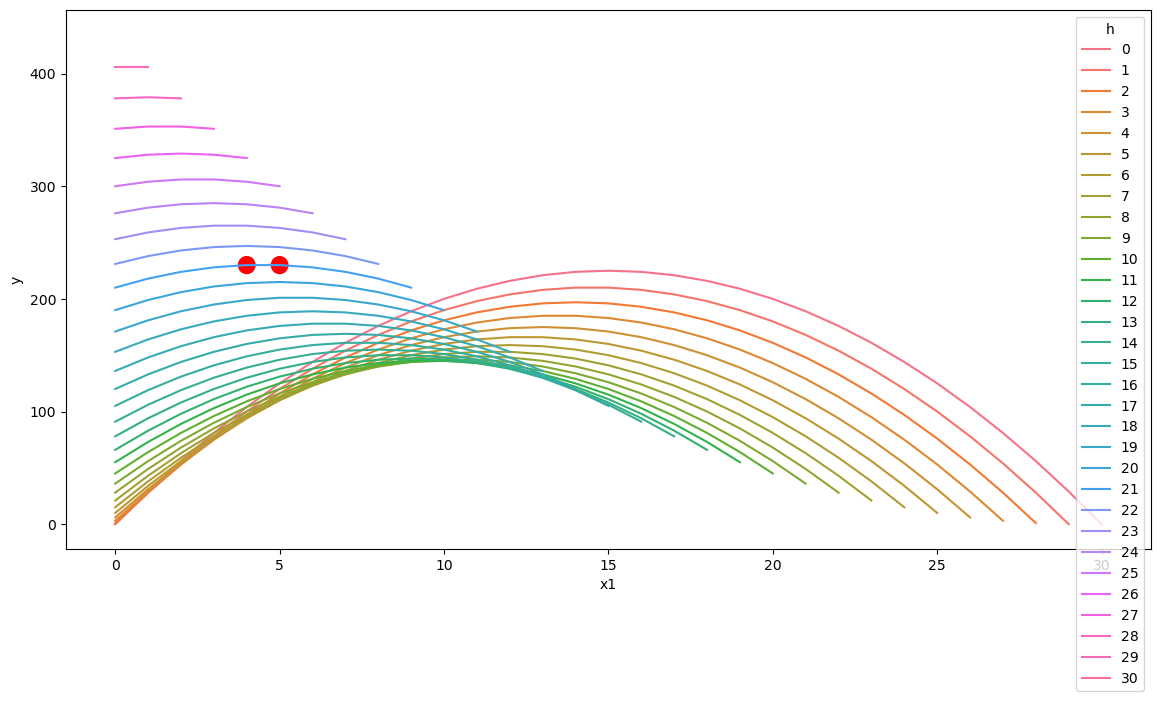

In [7]:
# Draw all of the curves for the problem as stated
draw(data, 230, (0.5, 15))

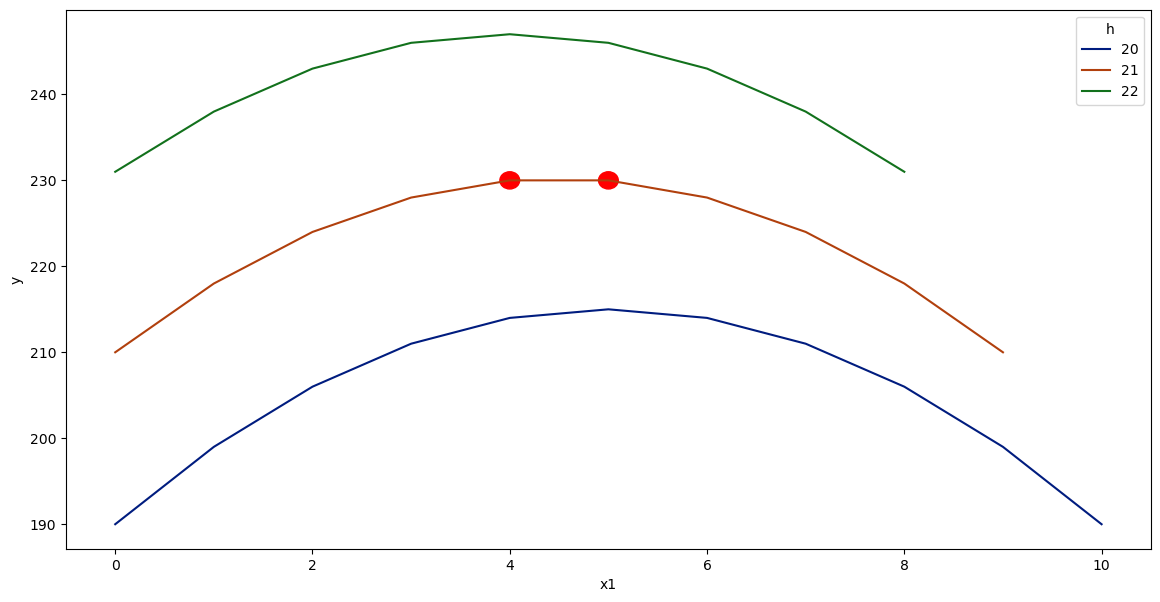

In [8]:
# Draw a graph with just the three curves around the answer.
# This shows that the curve above is to high at all points, and the curve belowe is too low.
under23 = data[data["x0"] < 23]
over19 = under23[under23["x0"] > 19]
subplot = draw(over19, 230, (0.2, 2))

,x0,x1,x2,y,h
36,1,5,24,120,1
55,1,24,5,120,1
270,10,5,15,120,10
280,10,15,5,120,10
328,13,3,14,120,13
339,13,14,3,120,13
376,16,0,14,120,16
390,16,14,0,120,16


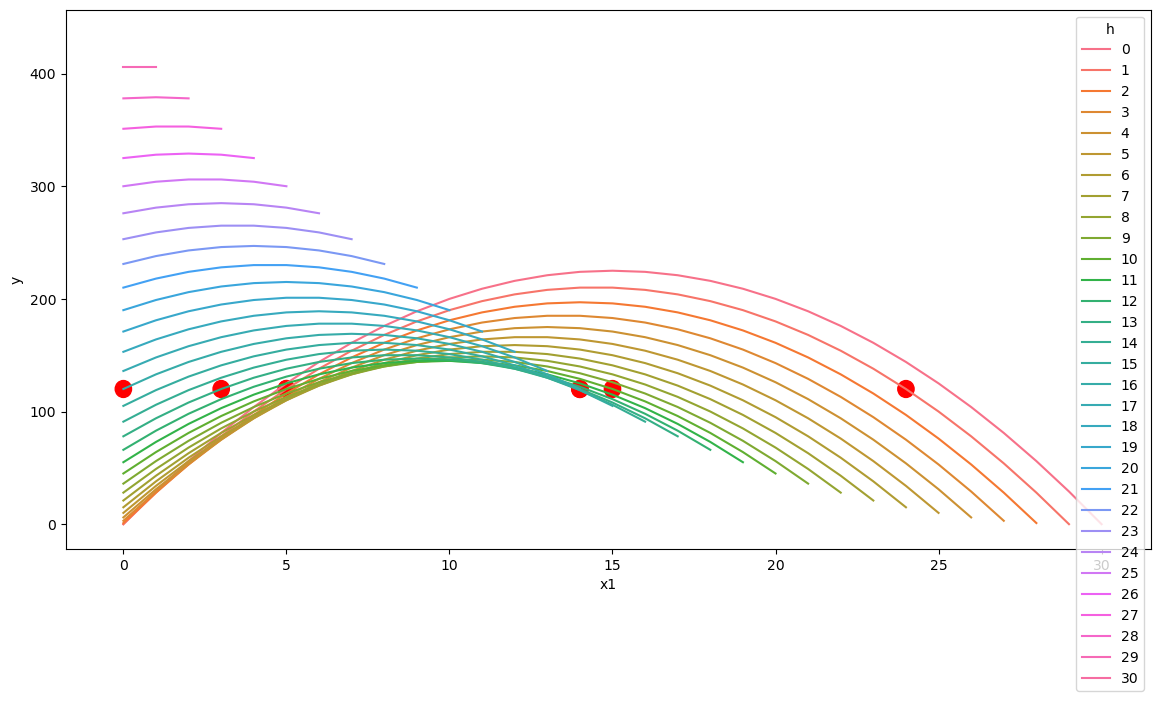

In [9]:
# Now, for curiosity, let's see how many solutions there are if the 
# goal is 120 multiples of three instead of 230.
draw(data, 120, (0.5, 15))